<a href="https://colab.research.google.com/github/arielmagbanua/image-classifiers/blob/main/mask-on-mask-off/notebook_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
import os
import zipfile

# Extract and Prepare Dataset

1.) Mount your Google Drive

2.) Designate a directory where you want to extract your dataset (E.g. `/content/mask-on-mask-off`).


In [15]:
# The path where to extract the dataset
COLAB_DATA_SET_PATH = '/content/mask-on-mask-off'

data_zip = '/content/drive/MyDrive/mlds/dataset/mask_on_off.zip'
zip_ref = zipfile.ZipFile(data_zip, 'r')
zip_ref.extractall(COLAB_DATA_SET_PATH)
zip_ref.close()

# Constants / Parameters

In [16]:
DESIRED_ACCURACY = 0.999

dataset_path = os.path.join(COLAB_DATA_SET_PATH)
print(dataset_path)

/content/mask-on-mask-off


# Callbacks

In [17]:
class Callbacks(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if logs.get('accuracy') > DESIRED_ACCURACY:
      print("\nReached 99.9% accuracy so cancelling training!")
      self.model.stop_training = True

# create the callbacks
callbacks = Callbacks()

# Build the Model

In [18]:
model = tf.keras.models.Sequential([
  # input layer
  # first convolution
  tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(360, 360, 3)),
  tf.keras.layers.MaxPooling2D(2, 2),

  # second convolution
  tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2, 2),

  # third convolution
  tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2, 2),

  # fourth convolution
  tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2, 2),

  # fifth convolution
  tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2, 2),

  # Flatten the results to feed into a DNN
  tf.keras.layers.Flatten(),

  # 512 neuron hidden layer
  tf.keras.layers.Dense(512, activation='relu'),

  # Only 1 output neuron.
  # It will contain a value from 0-1 where 0 for 1 class ('mask on') and 1 for the other ('mask off')
  tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the Model

In [19]:
model.compile(
  loss='binary_crossentropy',
  optimizer=Adam(),
  metrics=['accuracy']
)

# Prepare Dataset with Data Generator

In [20]:
# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(
  rescale=1./255,
  rotation_range=40,
  width_shift_range=0.2,
  height_shift_range=0.2,
  shear_range=0.2,
  zoom_range=0.2,
  horizontal_flip=True,
  fill_mode='nearest',
  validation_split=0.2
)

# training data generator
train_generator = train_datagen.flow_from_directory(
  dataset_path,  # This is the source directory for training images
  target_size=(360, 360),  # All images will be resized to 360x360
  batch_size=128,
  class_mode='binary',
  subset='training'
)

# validation data generator
validation_generator = train_datagen.flow_from_directory(
  dataset_path,
  target_size=(360, 360),  # All images will be resized to 360x360
  batch_size=32,
  class_mode='binary',
  subset='validation'
)

Found 1227 images belonging to 2 classes.
Found 306 images belonging to 2 classes.


# Train / Fit

In [21]:
history = model.fit(
  train_generator,
  validation_data=validation_generator,
  steps_per_epoch=8,
  epochs=100,
  verbose=1,
  callbacks=[callbacks]
)

Epoch 1/100
8/8 [==============================] - 49s 6s/step - loss: 0.7808 - accuracy: 0.5980 - val_loss: 0.6629 - val_accuracy: 0.5817
Epoch 2/100
8/8 [==============================] - 45s 6s/step - loss: 0.6562 - accuracy: 0.5723 - val_loss: 0.5529 - val_accuracy: 0.6438
Epoch 3/100
8/8 [==============================] - 44s 6s/step - loss: 0.4997 - accuracy: 0.7895 - val_loss: 0.3489 - val_accuracy: 0.8987
Epoch 4/100
8/8 [==============================] - 45s 6s/step - loss: 0.2343 - accuracy: 0.9381 - val_loss: 0.0655 - val_accuracy: 0.9804
Epoch 5/100
8/8 [==============================] - 44s 6s/step - loss: 0.1173 - accuracy: 0.9641 - val_loss: 0.0534 - val_accuracy: 0.9869
Epoch 6/100
8/8 [==============================] - 45s 6s/step - loss: 0.0451 - accuracy: 0.9855 - val_loss: 0.0363 - val_accuracy: 0.9935
Epoch 7/100
8/8 [==============================] - 44s 6s/step - loss: 0.0366 - accuracy: 0.9950 - val_loss: 0.0040 - val_accuracy: 1.0000
Epoch 8/100
8/8 [==========

# Plot the Training History

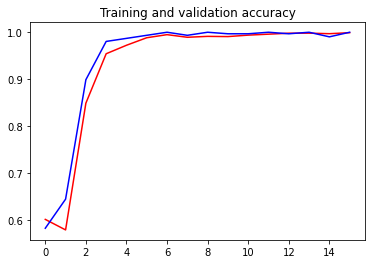

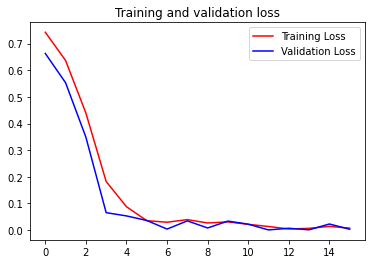

In [22]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()